## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential 
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  
import matplotlib.pyplot as plt 

## Importing the CSV file 

In [32]:
df=pd.read_csv(r"C:\Users\hp\Downloads\ASSIGNMENT_4\ASSIGNMENT_4\Multiple CSV\2.concerticcir1.csv",header=None) 
df.head()   

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


In [33]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [34]:
df[2].value_counts() 

1.0    50
0.0    50
Name: 2, dtype: int64

### Seperating the Input and Output Features

In [35]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int) 

In [36]:
x.head() 

,0,1
0,-0.382891,-0.090840
1,-0.020962,-0.477874
2,-0.396116,-1.289427
3,-0.618130,-0.063837
4,0.703478,-0.187038


In [37]:
y.head() 

0    1
1    1
2    0
3    1
4    1
Name: 2, dtype: int32

### Split the data into train and test 

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) 

In [39]:
x_train.shape 

(90, 2)

In [40]:
x_test.shape 

(10, 2)

### Standardising input features

In [41]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)  

### Build the Logical Structure

In [42]:
model=Sequential()
model.add(Dense(18,activation="relu",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001),input_dim=2))
model.add(Dense(16,activation="relu",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001)))
model.add(Dense(10,activation="relu",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001)))
model.add(Dense(1,activation="sigmoid"))  


In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 18)                54        
                                                                 
 dense_5 (Dense)             (None, 16)                304       
                                                                 
 dense_6 (Dense)             (None, 10)                170       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 539 (2.11 KB)
Trainable params: 539 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### compiling the model 

In [44]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=5,epochs=250,validation_split=0.1) 

Epoch 1/250
17/17 [==============================] - 1s 24ms/step - loss: 0.8191 - accuracy: 0.4938 - val_loss: 0.8062 - val_accuracy: 0.5556
Epoch 2/250
17/17 [==============================] - 0s 6ms/step - loss: 0.8168 - accuracy: 0.4938 - val_loss: 0.8048 - val_accuracy: 0.5556
Epoch 3/250
17/17 [==============================] - 0s 6ms/step - loss: 0.8139 - accuracy: 0.4938 - val_loss: 0.8039 - val_accuracy: 0.5556
Epoch 4/250
17/17 [==============================] - 0s 6ms/step - loss: 0.8117 - accuracy: 0.4691 - val_loss: 0.8027 - val_accuracy: 0.5556
Epoch 5/250
17/17 [==============================] - 0s 6ms/step - loss: 0.8100 - accuracy: 0.4321 - val_loss: 0.8017 - val_accuracy: 0.5556
Epoch 6/250
17/17 [==============================] - 0s 6ms/step - loss: 0.8075 - accuracy: 0.3951 - val_loss: 0.8010 - val_accuracy: 0.5556
Epoch 7/250
17/17 [==============================] - 0s 6ms/step - loss: 0.8062 - accuracy: 0.4198 - val_loss: 0.8001 - val_accuracy: 0.4444
Epoch 8/250


Epoch 59/250
17/17 [==============================] - 0s 7ms/step - loss: 0.6997 - accuracy: 0.7654 - val_loss: 0.7308 - val_accuracy: 0.8889
Epoch 60/250
17/17 [==============================] - 0s 6ms/step - loss: 0.6957 - accuracy: 0.7778 - val_loss: 0.7285 - val_accuracy: 0.8889
Epoch 61/250
17/17 [==============================] - 0s 7ms/step - loss: 0.6915 - accuracy: 0.7654 - val_loss: 0.7259 - val_accuracy: 0.7778
Epoch 62/250
17/17 [==============================] - 0s 6ms/step - loss: 0.6878 - accuracy: 0.7654 - val_loss: 0.7213 - val_accuracy: 0.7778
Epoch 63/250
17/17 [==============================] - 0s 6ms/step - loss: 0.6831 - accuracy: 0.7531 - val_loss: 0.7149 - val_accuracy: 0.8889
Epoch 64/250
17/17 [==============================] - 0s 7ms/step - loss: 0.6776 - accuracy: 0.7531 - val_loss: 0.7104 - val_accuracy: 0.8889
Epoch 65/250
17/17 [==============================] - 0s 6ms/step - loss: 0.6731 - accuracy: 0.7778 - val_loss: 0.7054 - val_accuracy: 0.8889
Epoch 

17/17 [==============================] - 0s 7ms/step - loss: 0.3182 - accuracy: 0.9259 - val_loss: 0.4110 - val_accuracy: 0.8889
Epoch 174/250
17/17 [==============================] - 0s 6ms/step - loss: 0.3136 - accuracy: 0.9259 - val_loss: 0.3954 - val_accuracy: 0.8889
Epoch 175/250
17/17 [==============================] - 0s 7ms/step - loss: 0.3097 - accuracy: 0.9259 - val_loss: 0.3920 - val_accuracy: 0.8889
Epoch 176/250
17/17 [==============================] - 0s 6ms/step - loss: 0.3096 - accuracy: 0.9259 - val_loss: 0.3938 - val_accuracy: 0.8889
Epoch 177/250
17/17 [==============================] - 0s 6ms/step - loss: 0.3074 - accuracy: 0.9259 - val_loss: 0.3783 - val_accuracy: 0.8889
Epoch 178/250
17/17 [==============================] - 0s 6ms/step - loss: 0.3062 - accuracy: 0.9259 - val_loss: 0.3748 - val_accuracy: 0.8889
Epoch 179/250
17/17 [==============================] - 0s 6ms/step - loss: 0.3046 - accuracy: 0.9259 - val_loss: 0.3773 - val_accuracy: 0.8889
Epoch 180/250

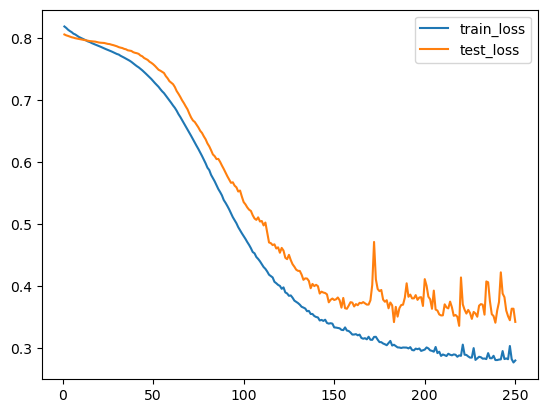

In [45]:
plt.plot(range(1,251),history.history["loss"],label="train_loss")
plt.plot(range(1,251),history.history["val_loss"],label="test_loss") 
plt.legend()

### Predicting the model 

In [46]:
predicted=model.predict(x_test) 
predicted 

1/1 [==============================] - 0s 146ms/step


array([[3.3429358e-04],
       [8.8690042e-01],
       [9.7125971e-01],
       [1.3041918e-02],
       [6.1408848e-01],
       [1.2707420e-02],
       [7.0393467e-01],
       [3.4442477e-04],
       [1.6085227e-04],
       [9.8446029e-01]], dtype=float32)

In [47]:
predicted=np.where(predicted>0.5,1,0)
predicted  

array([[0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1]])

### Evaluating the model

1.0


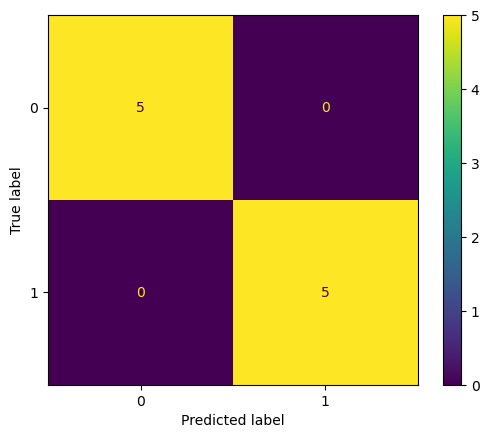

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()

### PLOTING THE DECISION SURFACE

In [49]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 22s 2ms/step


<AxesSubplot:>

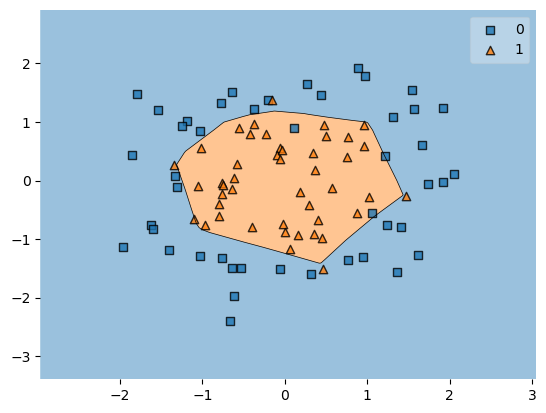

In [50]:
plot_decision_regions(x_train,y_train.values,clf=model) 

9600/9600 [==============================] - 23s 2ms/step


<AxesSubplot:>

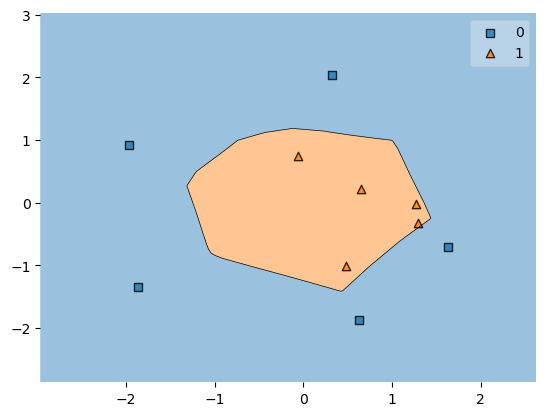

In [51]:
plot_decision_regions(x_test,y_test.values,clf=model)  

In [52]:
# This model achieves an accuracy of 95%. The model architecture consists of 3 hidden layers, Below are the mentioned Specifications
# 1st HL:-18 neurons with the ReLU activation functions and L2 regularizer with a strength of 0.001.
# 2nd HL:-16 neurons with the ReLU activation function and L2 regularizer with a strength of 0.001.
# 3rd HL:-10 neurons with the ReLU activation function and L2 regularizer with a strength of 0.001.
# output layer :- sigmoid activation function.
# Loss function: Binary cross-entropy.
# Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 5 with learning rate of 0.01.
# The model was trained for 250 epochs